In [70]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [1]:
(spark.sql('SHOW DATABASES').show())

+------------+
|databaseName|
+------------+
|     default|
| opengovdata|
|          sm|
|        test|
+------------+



In [5]:
spark.sql('SHOW TABLES FROM default').show(truncate = False)

+--------+----------------------+-----------+
|database|tableName             |isTemporary|
+--------+----------------------+-----------+
|default |civil_society_selected|false      |
|default |world_bank_selected   |false      |
+--------+----------------------+-----------+



In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy .cluster.hierarchy import linkage
%matplotlib inline

civil_society_selected = spark.sql("SELECT * FROM opengovdata.civil_society_selected WHERE SUB_REGION = 'Eastern Europe'")

civil_society_selected = civil_society_selected.toPandas()

world_bank_selected = spark.sql("SELECT * FROM opengovdata.world_bank_selected WHERE SUB_REGION = 'Eastern Europe'")

world_bank_selected = world_bank_selected.toPandas()

merged = spark.sql("SELECT * FROM opengovdata.civil_society_selected cs join opengovdata.world_bank_selected wb on cs.YEAR = wb.YEAR AND cs.COUNTRY = wb.COUNTRY")
merged = merged.toPandas()

In [196]:
merged.shape

(5992, 396)

In [143]:
df = civil_society_selected

<bound method DataFrame.corr of         YEAR      COUNTRY  WAVE_WVS WAVE_DESC_WVS  RESPONDED_CHURCH_N_WVS  \
0     1990.0  Afghanistan       NaN          None                     NaN   
1     1991.0  Afghanistan       NaN          None                     NaN   
2     1992.0  Afghanistan       NaN          None                     NaN   
3     1993.0  Afghanistan       NaN          None                     NaN   
4     1994.0  Afghanistan       NaN          None                     NaN   
5     1995.0  Afghanistan       NaN          None                     NaN   
6     1996.0  Afghanistan       NaN          None                     NaN   
7     1997.0  Afghanistan       NaN          None                     NaN   
8     1998.0  Afghanistan       NaN          None                     NaN   
9     1999.0  Afghanistan       NaN          None                     NaN   
10    2000.0  Afghanistan       NaN          None                     NaN   
11    2001.0  Afghanistan       NaN         

In [153]:
countries = ['Czech Republic', 'Poland', 'Hungary']
df = df[df.COUNTRY.isin(countries)]
df.query('COUNTRY in @countries')
cze = df[df.COUNTRY=='Czech Republic']
hun = df[df.COUNTRY=='Hungary']
pol = df[df.COUNTRY=='Poland']
p = figure()
p.line(cze.YEAR, cze['v2xcs_ccsi_VDEM'.upper()], color = 'red')
p.line(hun.YEAR, hun['v2xcs_ccsi_VDEM'.upper()], color = 'blue')
p.line(pol.YEAR, pol['v2xcs_ccsi_VDEM'.upper()], color = 'green')
show(p)

ValueError: The condensed distance matrix must contain only finite values.

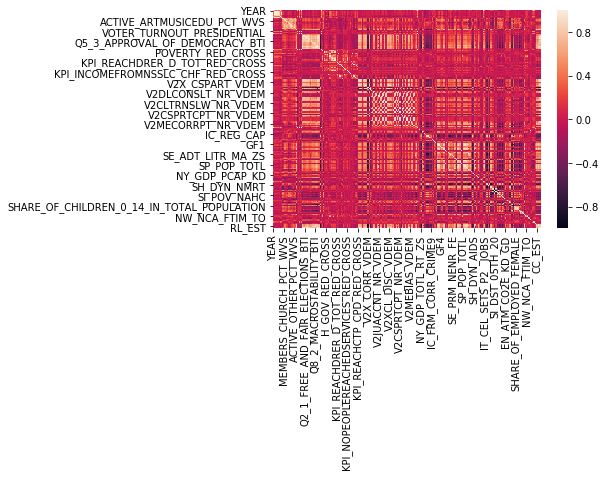

In [194]:
corr_matrix = merged.corr()
import seaborn as sns
sns.heatmap(corr_matrix)
Z = linkage(corr_matrix)

In [121]:
from bokeh.plotting import figure, save
from bokeh.models import ColumnDataSource, DatetimeTickFormatter
from bokeh.palettes import brewer
from bokeh.io import output_file

data_plot['datetime'] = time_x
cols = data_plot.columns.tolist()
cols.insert(0, cols.pop(cols.index('datetime')))
data_plot = data_plot.reindex(columns=cols)

p = figure(x_axis_type='datetime', width=1400)
src = ColumnDataSource(data_plot)
for col, colour in zip(data_plot.columns.values[1:],
                       brewer['Set3'][12]):
    p.step(x='datetime', y=col, source=src, line_color=colour, legend=col + '_',
           line_width=2)
p.xaxis.formatter = DatetimeTickFormatter(
    hours=["%d %B %Y"],
    days=["%d %B %Y"],
    months=["%d %B %Y"],
    years=["%d %B %Y"],
)
p.xaxis.major_label_orientation = math.pi / 5
output_file(os.path.join(result_path, 'result_visual.html'), mode='inline')
p.legend.location = 'top_left'
p.legend.click_policy = 'hide'
# save(p)
show(p)

NameError: name 'time_x' is not defined

In [149]:
df.groupby('COUNTRY').V2CLTORT_VDEM.nunique()

COUNTRY
Afghanistan                 13
Albania                      5
Algeria                      7
Andorra                      0
Angola                       7
Anguilla                     0
Antigua and Barbuda          0
Argentina                    4
Armenia                     21
Aruba                        0
Australia                    4
Austria                      5
Azerbaijan                  11
Bahamas                      0
Bahrain                      0
Bangladesh                  11
Barbados                     3
Belarus                     14
Belgium                      3
Belize                       0
Benin                        8
Bermuda                      0
Bhutan                      10
Bolivia                      6
Bosnia and Herzegovina      10
Botswana                     5
Brazil                       7
British Virgin Islands       0
Brunei Darussalam            0
Bulgaria                     9
                            ..
Sweden                       6


In [160]:
cze.apply(pd.Series.nunique)

YEAR                             28
COUNTRY                           1
WAVE_WVS                          2
WAVE_DESC_WVS                     2
RESPONDED_CHURCH_N_WVS            2
RESPONDED_SPORT_N_WVS             2
RESPONDED_ARTMUSICEDU_N_WVS       2
RESPONDED_LABORUNION_N_WVS        2
RESPONDED_POLITICAL_N_WVS         2
RESPONDED_ENVIRONMENTAL_N_WVS     2
RESPONDED_PROFESSIONAL_N_WVS      2
RESPONDED_CHARITY_N_WVS           2
RESPONDED_OTHER_N_WVS             2
RESPONDED_CONSUMER_N_WVS          1
RESPONDED_HELP_GROUP_N_WVS        1
RESPONDED_ANY_N_WVS               2
ACTIVE_CHURCH_PCT_WVS             1
MEMBERS_CHURCH_PCT_WVS            1
ACTIVE_SPORT_PCT_WVS              1
MEMBERS_SPORT_PCT_WVS             1
ACTIVE_ARTMUSICEDU_PCT_WVS        1
MEMBERS_ARTMUSICEDU_PCT_WVS       1
ACTIVE_LABORUNION_PCT_WVS         1
MEMBERS_LABORUNION_PCT_WVS        1
ACTIVE_POLITICAL_PCT_WVS          1
MEMBERS_POLITICAL_PCT_WVS         1
ACTIVE_ENVIRONMENTAL_PCT_WVS      1
MEMBERS_ENVIRONMENTAL_PCT_WV

In [163]:
central_europe = df[df.SUB_REGION == 'Eastern Europe']


,YEAR,COUNTRY,WAVE_WVS,WAVE_DESC_WVS,RESPONDED_CHURCH_N_WVS,RESPONDED_SPORT_N_WVS,RESPONDED_ARTMUSICEDU_N_WVS,RESPONDED_LABORUNION_N_WVS,RESPONDED_POLITICAL_N_WVS,RESPONDED_ENVIRONMENTAL_N_WVS,...,V2PEEDUEQ_VDEM,V2PEEDUEQ_NR_VDEM,V2PEHEALTH_VDEM,V2PEHEALTH_NR_VDEM,V2PEPRISCH_VDEM,V2PESECSCH_VDEM,V2PETERSCH_VDEM,REGION,SUB_REGION,INTERMEDIATE_REGION
1372,1990.0,Czech Republic,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,2.959273,5.0,2.577064,5.0,80.51815,77.46824,16.783222,Europe,Eastern Europe,
1373,1991.0,Czech Republic,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,2.959273,5.0,2.577064,5.0,83.36210,75.99861,16.741600,Europe,Eastern Europe,
1374,1992.0,Czech Republic,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,2.959273,5.0,2.577064,5.0,87.00877,72.95744,15.358479,Europe,Eastern Europe,
1375,1993.0,Czech Republic,2.0,1989-1993,0.0,0.0,0.0,0.0,0.0,0.0,...,2.959273,5.0,2.577064,5.0,88.59129,74.59695,15.219568,Europe,Eastern Europe,
1376,1994.0,Czech Republic,2.0,1989-1993,0.0,0.0,0.0,0.0,0.0,0.0,...,2.959273,5.0,2.577064,5.0,90.60193,76.44035,20.155939,Europe,Eastern Europe,
1377,1995.0,Czech Republic,2.0,1989-1993,0.0,0.0,0.0,0.0,0.0,0.0,...,2.959273,5.0,2.577064,5.0,89.51633,79.88929,21.291681,Europe,Eastern Europe,
1378,1996.0,Czech Republic,2.0,1989-1993,0.0,0.0,0.0,0.0,0.0,0.0,...,2.959273,5.0,2.577064,5.0,88.92002,83.45717,22.124901,Europe,Eastern Europe,
1379,1997.0,Czech Republic,2.0,1989-1993,0.0,0.0,0.0,0.0,0.0,0.0,...,2.959273,5.0,2.577064,5.0,86.90173,74.77534,23.856503,Europe,Eastern Europe,
1380,1998.0,Czech Republic,3.0,1994-1998,1144.0,1143.0,1142.0,1113.0,1142.0,1141.0,...,2.959273,5.0,2.577064,5.0,87.66624,70.15411,24.254951,Europe,Eastern Europe,
1381,1999.0,Czech Republic,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,2.959273,5.0,2.577064,5.0,87.41395,70.92715,25.881769,Europe,Eastern Europe,


In [173]:
type(central_europe.COUNTRY.unique()[0])

unicode